In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from scipy.optimize import curve_fit
import time

In [13]:
def daction(x1,x,xm1,xp):
    dxn=xp-x
    sxn=xp+x
    sx1=x1+xm1
    
    delta_s=dxn*(sxn*(c1 + c2) -sx1*c1)
    
    return delta_s

def exp_fun(x, a, b, c):
    return  a*(np.exp(-b*x)) + c

def metro(config,num_lat_points):
    
    state=config
    points=num_lat_points
     
    for n in range(points):

        x_t=(np.random.uniform((state[n]-step), (state[n]+step)))
        if n==0:
            delta=daction(state[n+1],state[n],state[points-1],x_t)

            if np.exp(-delta)> (np.random.uniform(0,1)):
                np.put(state,[n],[x_t])
            else:
                pass

        elif n==(points-1):
            delta=daction(state[0],state[n],state[n-1],x_t)

            if np.exp(-delta)> (np.random.uniform(0,1)):
                np.put(state,[n],[x_t])
            else:
                pass
        else:
            delta=daction(state[n+1],state[n],state[n-1],x_t)

            if  np.exp(-delta) > (np.random.uniform(0,1)):
                np.put(state,[n],[x_t])
            else:
                pass
    return(state)
    

def thermalization(num_iter,lat_points):
    tniter=num_iter 
    num_accept=0
    points=lat_points
    state=0*np.random.random_sample((points,))
    avg_pos=0*np.random.random_sample((tniter+1,))
    avg_pos2=0*np.random.random_sample((tniter+1,))
    

    for h in state:
            avg_pos[0]=avg_pos[0]+h
            avg_pos2[0]=avg_pos2[0]+h**2

    for m in range(tniter):

        for n in range(points):

            x_t=(np.random.uniform((state[n]-step), (state[n]+step)))
            if n==0:
                delta=daction(state[n+1],state[n],state[points-1],x_t)

                if np.exp(-delta)> (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                    num_accept=num_accept+1
                else:
                    pass

            elif n==(points-1):
                delta=daction(state[0],state[n],state[n-1],x_t)

                if np.exp(-delta)> (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                    num_accept=num_accept+1
                else:
                    pass
            else:
                delta=daction(state[n+1],state[n],state[n-1],x_t)

                if  np.exp(-delta) > (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                    num_accept=num_accept+1
                else:
                    pass

        for h in state:
            avg_pos[m+1]=avg_pos[m+1]+h
            avg_pos2[m+1]=avg_pos2[m+1]+h**2

    avg_pos=avg_pos/points
    avg_pos2=avg_pos2/points
    print("Acceptance ratio :", num_accept/(tniter*points), "\n The acceptance ratio needs to be around 0.5. \n If it's too low try reducing 'step', and vv if it's too high. ")
    
    config=np.arange(tniter+1)

    plt.figure(1)
    plt.xlabel('Configuration')
    plt.ylabel('Average distance squared')
    plt.title('Distance squared vs configuration number')
    plt.plot(config, avg_pos2)
    plt.show()
    
    plt.figure(2)
    plt.xlabel('Configuration')
    plt.ylabel('Average distance squared')
    plt.title('Distance squared vs configuration number. Tuned axis')
    plt.plot(config, avg_pos2)
    plt.axis([0,400,0,max(avg_pos2)]) ####May need to tune x-axis
    plt.show()
    
    plt.figure(3)
    plt.xlabel('Configuration')
    plt.ylabel('g/s energy')
    plt.title('g/s energy vs configuration number')
    plt.plot(config, (mu**2)*avg_pos2)
    plt.show()
    
    
    
def data(spring_const,mass,lattice_spacing,num_config,num_lat_points):
    mu=spring_const
    m=mass
    a=lattice_spacing
    niter=num_config
    points=num_lat_points
    smu=str(mu)
    sm=str(m)
    sma=str(a)
    sniter=str(niter)
    spoints=str(points)
    name=smu+sm+sma+sniter+spoints
    
    state=0*np.random.random_sample((points,)) #### Initial state
    f=open('data'+name+'.txt' , 'w')
    
    for m in range(ttime): #### thermalizaing state

        state=metro(state,points) #### config,num_lat_points    
    for h in state:
        f.write(str(h) + '\n')
    
    for m in range(niter):

        state=metro(state,points) #### config,num_lat_points
        
        for h in state:
            f.write(str(h) + '\n')
        
    f.close()

def corr(spring_const,mass,lattice_spacing,num_config,num_lat_points):
    mu=spring_const
    m=mass
    a=lattice_spacing
    niter=num_config
    points=num_lat_points
    smu=str(mu)
    sm=str(m)
    sma=str(a)
    sniter=str(niter)
    spoints=str(points)
    name=smu+sm+sma+sniter+spoints
    
    f=open('data'+name+'.txt' , 'r')
    data=f.readlines()
    f.close()
    corr=[]
    for n in range(corrt):
        
        sum1=0
        sum2=0
        for m in range(points):
            sum1=sum1+(eval(data[m])*eval(data[m+((n+1)*points)]))
        corr=np.append(corr,sum1/points)
    
    corr_time=np.arange(corrt)
    corr=corr/(max(corr))
    
    popt, pcov = curve_fit(exp_fun, corr_time, corr)
    
    plt.figure(1)
    plt.xlabel('Correlation time')
    plt.ylabel('Correlation')
    plt.title('Correlation graph')
    plt.plot(corr_time, exp_fun(corr_time, *popt))
    plt.plot(corr_time, corr)
    plt.show()
    
    plt.figure(2)
    plt.plot(corr_time, exp_fun(corr_time, *popt))
    plt.plot(corr_time,corr,'.')
    plt.axis([0,200,min(corr),max(corr)])
    plt.show()
            
    return (popt, pcov, data)
    
def binning(spring_const,mass,lattice_spacing,num_config,num_lat_points,size_of_bin,d_volume):
    mu=spring_const
    m=mass
    a=lattice_spacing
    niter=num_config
    points=num_lat_points
    smu=str(mu)
    sm=str(m)
    sma=str(a)
    sniter=str(niter)
    spoints=str(points)
    name=smu+sm+sma+sniter+spoints
    
    bin_size=size_of_bin
    num_bins=int(niter/bin_size)
    
    delta=d_volume/2 #### 'infinitesimal' volume about a point
    ppdensity=[0]
    npdensity=[0]
    bdps=[] #### binned dps to determine max and min
    
    f=open('binned_data'+name+'.txt' , 'w')
    g=open('data'+name+'.txt', 'r')
    
    for n in range(num_bins):
        
        sum1=0
        for m in range(bin_size):
            for l in range(points):
                num=eval(g.readline())
                sum1=sum1+num
            
            
            
        bdp=sum1/(points*bin_size)
        f.write(str(bdp) + '\n')
        bdps=np.append(bdps,bdp)
        
        if bdp >= 0:
            axis=int(bdp/delta +1)
            while axis > len(ppdensity): ########
                ppdensity=np.append(ppdensity,0)
                
            ppdensity[axis-1]=ppdensity[axis-1] +1
        
        else:
            mbdp=abs(bdp)
            axis=int(mbdp/delta +1)
            while axis > len(npdensity): ##########
                npdensity=np.append(npdensity,0)

            npdensity[axis-1]=npdensity[axis-1]+1
                
    f.close()
    g.close()
    
    f=open('2binned_data'+name+'.txt' , 'w')
    g=open('data'+name+'.txt', 'r')
    
    for n in range(num_bins):
        
        sum1=0
        for m in range(bin_size):
            
            for l in range(points):
                num=eval(g.readline())
                sum1=sum1+num**2
            
            
            
        f.write(str(sum1/(points*bin_size)) + '\n')
    
    f.close()
    g.close()
    
    npmax=len(npdensity) -1
    ppmax=len(ppdensity) -1 ######## no -1 because of how np.arange() works, it stops 1 too early
    npdensity=np.fliplr([npdensity])[0]
    
    pdensity=np.append(npdensity,ppdensity)
    position=np.arange(-delta/2 -npmax*delta, delta + ppmax*delta, delta)
    
    
        
    
    plt.figure(1)
    plt.xlabel('Position')
    plt.ylabel('Probability Density')
    plt.title('Probability graph')
    plt.plot(position, pdensity)
    plt.show()
    
    plt.figure(2)
    plt.xlabel('Position')
    plt.ylabel('Probability Density')
    plt.title('Probability graph')
    plt.plot(position, pdensity, '.')
    plt.show()
    
    sum1=0
    for x in pdensity:
        sum1=sum1+x
    area=sum1*delta
    pdensity=(1/area)*pdensity
    
    plt.figure(3)
    plt.xlabel('Position')
    plt.ylabel('Probability Density')
    plt.title('Normalized probability graph')
    plt.plot(position, pdensity)
    plt.show()
    
    plt.figure(4)
    plt.xlabel('Position')
    plt.ylabel('Probability Density')
    plt.title('Normalized probability graph')
    plt.plot(position, pdensity, '.')
    plt.show()
    
def calc(spring_const,mass,lattice_spacing,num_config,num_lat_points):
    mu=spring_const
    m=mass
    a=lattice_spacing
    niter=num_config
    points=num_lat_points
    smu=str(mu)
    sm=str(m)
    sma=str(a)
    sniter=str(niter)
    spoints=str(points)
    name=smu+sm+sma+sniter+spoints
    
    f=open('2binned_data'+name+'.txt' , 'r')
    data=f.readlines()
    
    sum1=0
    for n in data:
        sum1=sum1+(eval(n))
    energy=(mu**2)*(sum1/len(data))
    print(energy)
    f.close()
    


    
    
    
    

# Parameters

In [7]:
mu=1 #### spring constant
m=1 #### mass
a=0.1 #### lattice spacing
num_iterations=10000
lat_points=int(20/a)
d_volume = 0.1 #### infinitesimal volume for probability density

#niter=int(10/a)
tniter=1000 #### Number of iterations used in running thermalization function
step=0.7 #### metropolis step

c1=m/a
c2=(a*(mu**2))/2

ttime=600 #### thermalization time to be used in run
corrt = 400 #### correlation time

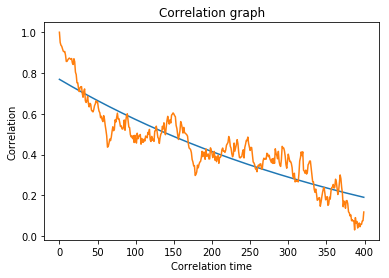

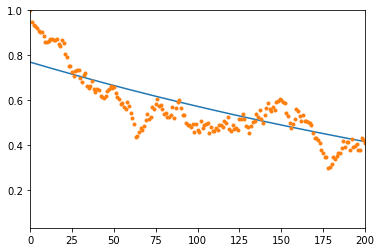

441


ValueError: x and y must have same first dimension, but have shapes (16,) and (15,)

In [8]:
data(mu,m,a,num_iterations,lat_points) #### spring_const,mass,lattice_spacing,num_config,num_lat_points

results=corr(mu,m,a,num_iterations,lat_points) #### spring_const,mass,lattice_spacing,num_config,num_lat_points
bin_size=int(1/results[0][1] + 1)
print(bin_size)

binning(mu,m,a,num_iterations,lat_points,bin_size,d_volume) 
#### spring_const,mass,lattice_spacing,num_config,num_lat_points,size_of_bin,raw_data,d_volume

calc(mu,m,a,num_iterations,lat_points) ####spring_const,mass,lattice_spacing,num_config,num_lat_points



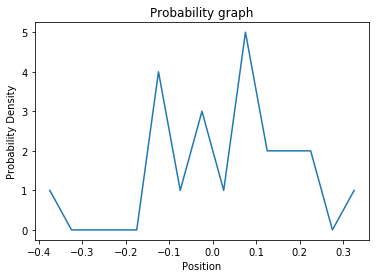

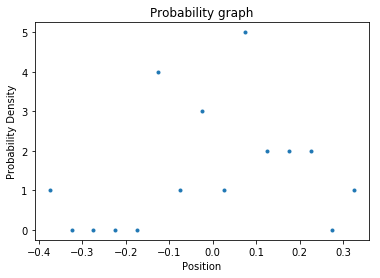

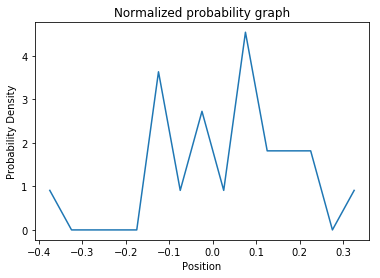

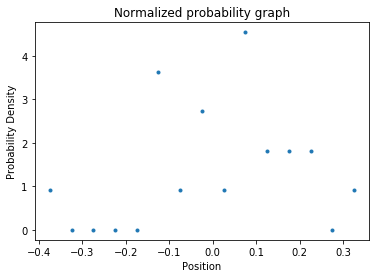

0.45930660052464684


In [14]:
binning(mu,m,a,num_iterations,lat_points,bin_size,d_volume) 
#### spring_const,mass,lattice_spacing,num_config,num_lat_points,size_of_bin,raw_data,d_volume

calc(mu,m,a,num_iterations,lat_points) ####spring_const,mass,lattice_spacing,num_config,num_lat_points


In [12]:
calc(mu,m,a,num_iterations,lat_points) ####spring_const,mass,lattice_spacing,num_config,num_lat_points




0.9354647537595677


# Thermalization

Acceptance ratio : 0.475935 
 The acceptance ratio needs to be around 0.5. 
 If it's too low try reducing 'step', and vv if it's too high. 


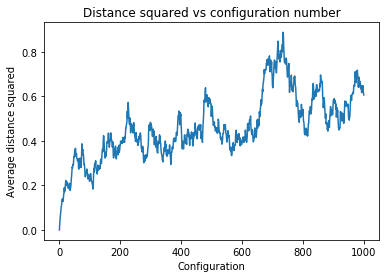

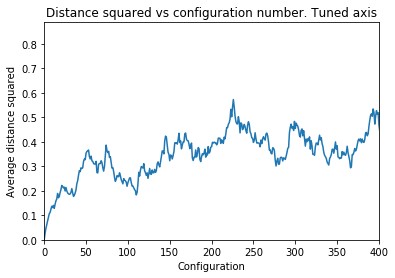

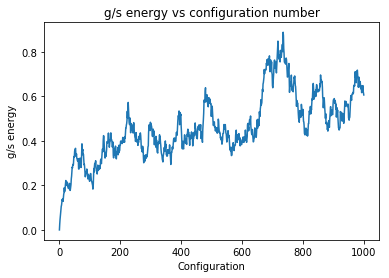

In [6]:
thermalization(tniter,lat_points)

In [26]:
smu=str(mu)
sm=str(m)
sma=str(a)
sniter=str(num_iterations)
spoints=str(lat_points)
name=smu+sm+sma+sniter+spoints
g=open('data'+name+'.txt', 'r')
sum1=0
for i in range(lat_points):
    num=eval(g.readline())
    sum1=sum1+num**2
    print(sum1)
    time.sleep(0.1)
print(sum1/lat_points)    
g.close()

0.3969999217681727
0.5731246688049065
0.6160777604510187
0.7043987586008486
0.8070797635078772
1.1395679332168498
1.445825865196099
1.5489880321530685
1.620454053342137
1.676586566379197
1.6822869760930006
1.8367467873655625
1.859519544097749
2.350284905659057
2.3575428002367813
2.3591522789218344
3.012479611901931
4.105523272238516
4.354092109625691
5.208563266581825
5.297827471662747
5.53924818007626
5.5726331575352885
6.678208920203524
6.757719571450565
6.758707866123014
6.8697616643012145
6.875668286590193
7.212841738145258
7.769116154403633
8.721984729775658
8.743644253338974
8.769866006756084
8.779870349753322
8.858357933637283
9.106180420002662
9.310026916805407
9.483059681581727
10.075536060582031
11.996358824411594
12.077780137606013
12.374750182777609
13.23431386136322
13.397687423567652
13.460606597967834
14.020757918128705
14.645222422035047
14.702996140383886
14.772655750415115
15.190364162963245
15.196791300953642
15.411300947203216
15.433127517444527
15.504034684985863
1

KeyboardInterrupt: 

In [9]:
state=0*np.random.random_sample((points,))
print(state)
state=metro(state)
for h in state:
    print(h)
print(state)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
0.0
0.0
0.393443280001
-0.0691629469475
0.0
0.0
0.0532327505351
0.0
0.143962724904
0.0
[ 0.          0.          0.39344328 -0.06916295  0.          0.
  0.05323275  0.          0.14396272  0.        ]


In [44]:
for m in range(5): #### thermalizaing state

    state=metro(state)

for h in state:
    print(h)

for m in range(10):

    state=metro(state)

    for h in state:

        print(h)

-0.18809428788
-0.489623135546
-0.14928350657
0.136586587681
-0.140194725407
0.0463533281049
-0.12567815604
0.108358249192
-0.197488438007
-0.0109625925767
-0.18809428788
-0.489623135546
-0.00893980171868
0.52964657475
0.350718057381
-0.208811581686
0.273849160855
-0.108958820873
-0.197488438007
-0.193704244674
0.407308741137
0.203246666254
-0.0260584436132
0.0191366941952
0.348161726549
0.58782976642
0.273849160855
-0.108958820873
0.414191033127
-0.193704244674
0.120930159193
0.203246666254
0.00814835155247
-0.0269805515768
0.348161726549
0.58782976642
-0.00489113154122
0.613667758573
0.112929184502
-0.193704244674
0.120930159193
0.203246666254
0.00814835155247
-0.0269805515768
-0.146835284171
0.546757676177
-0.318760267921
0.31100416656
-0.227588066809
0.457248556445
-0.0491506497685
0.0237232315355
0.00814835155247
-0.0269805515768
-0.146835284171
0.546757676177
-0.318760267921
0.31100416656
0.242201657175
0.457248556445
0.403058079227
0.0237232315355
0.00814835155247
-0.42213322011

In [51]:
f=open('test.txt' , 'w')
    
for m in range(ttime): #### thermalizaing state

    state=metro(state)
print(state)

for h in state:
    f.write(str(h) + '\n')

for m in range(10):

    state=metro(state)

    for h in state:
        f.write(str(h) + '\n')

f.close()

[ 1.6694313   1.49849148  1.08000755  1.19063849  0.20098927  0.67366841
  1.13368161  1.1548348   2.03874579  2.26340544]


In [10]:
metro(state)

array([ 0.19588397,  0.94379448,  0.39344328, -0.06916295,  0.        ,
        0.        ,  0.05323275,  0.58459011,  0.14396272,  0.        ])